In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [4]:
uac7 = pd.read_csv("Unemployment and Crime.csv")

In [8]:
uac8 = uac7[['Larceny', 'Unemploy_Georgia']]

In [9]:
uac8.head()

,Larceny,Unemploy_Georgia
0,17968,0.091
1,14844,0.086
2,16621,0.082
3,17401,0.079
4,19277,0.082


## Assumptions

In [10]:
uac8.dropna(inplace = True)

<ipython-input-10-45e90a51721f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac8.dropna(inplace = True)


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Larceny', ylabel='Density'>

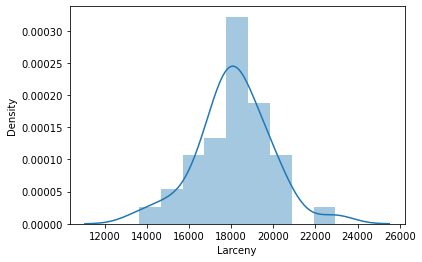

In [11]:
sns.distplot(uac8['Larceny'])

In [13]:
uac8['LarcenySQRT'] = np.sqrt(uac8['Larceny'])

<ipython-input-13-261250ba9b00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac8['LarcenySQRT'] = np.sqrt(uac8['Larceny'])


In [14]:
uac8.head()

,Larceny,Unemploy_Georgia,LarcenySQRT
0,17968,0.091,134.044769
1,14844,0.086,121.835955
2,16621,0.082,128.922457
3,17401,0.079,131.912850
4,19277,0.082,138.841636


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LarcenySQRT', ylabel='Density'>

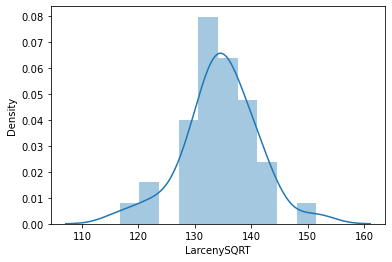

In [15]:
sns.distplot(uac8['LarcenySQRT'])

In [16]:
scipy.stats.bartlett(uac8['LarcenySQRT'], uac8['Unemploy_Georgia'])

BartlettResult(statistic=396.0616119114159, pvalue=3.9653608719881363e-88)

In [18]:
scipy.stats.fligner(uac8['LarcenySQRT'], uac8['Unemploy_Georgia'])

FlignerResult(statistic=45.51382094232037, pvalue=1.5156555687264793e-11)

## Sample

In [19]:
uac8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Larceny           36 non-null     int64  
 1   Unemploy_Georgia  36 non-null     float64
 2   LarcenySQRT       36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


## Independence

In [20]:
uac8.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [21]:
postHoc = MultiComparison(uac8['LarcenySQRT'], uac8['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 0.054  0.057   0.4311    0.9 -17.9345 18.7966  False
 0.054   0.06  -0.3313    0.9 -20.4498 19.7871  False
 0.054  0.061   2.0678    0.9 -22.5722 26.7077  False
 0.054  0.062   2.0603    0.9 -22.5797 26.7003  False
 0.054  0.063  -8.8101    0.9 -28.9285 11.3083  False
 0.054  0.064   4.6619    0.9 -15.4566 24.7803  False
 0.054  0.066   3.4419    0.9 -16.6766 23.5603  False
 0.054  0.067   5.0659    0.9 -19.5741 29.7058  False
 0.054  0.069   7.3754    0.9 -17.2646 32.0154  False
 0.054  0.072  10.1381    0.9 -14.5019 34.7781  False
 0.054  0.073   1.2308    0.9 -17.1347 19.5964  False
 0.054  0.074   0.3938    0.9 -24.2462 25.0338  False
 0.054  0.075  -8.9177    0.9 -33.5576 15.7223  False
 0.054  0.076  11.9349 0.5854  -8.1835 32.0534  False
 0.054  0.079   3.3956    0.9 -16.7229  23.514  False
 0.054   0.08  13.9044 0.373

In [22]:
uac8.groupby('Unemploy_Georgia').mean()

,Larceny,LarcenySQRT
Unemploy_Georgia,,
0.054,17345.500000,131.685728
0.057,17460.333333,132.116799
0.060,17269.000000,131.354422
0.061,17890.000000,133.753505
0.062,17888.000000,133.746028
0.063,15136.500000,122.875629
0.064,18592.000000,136.347591
0.066,18259.500000,135.127603
0.067,18701.000000,136.751600
